# Two layer perceptron 3.2

In [525]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

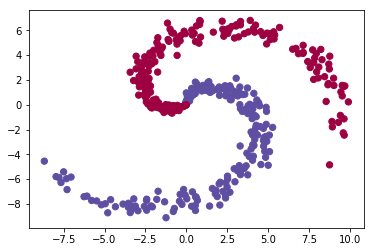

In [526]:
N = 200 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D))# data matrix (each row = single example)
#y = np.zeros(N*K, dtype='uint8') # class labels

y = np.ones(N,dtype=np.int)
minus = -1 * np.ones(N,dtype=np.int)
y = np.append(y,minus)

for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,10,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    #y[ix] = j
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)


'''
train = X[:int(len(X)/2)]
test = X[int(len(X)/2):]
train_class = y[:int(len(X)/2)]
test_class = y[int(len(X)/2):]
'''

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [527]:
len(y_test)

100

In [528]:
#Won't be implemented for now
class layer():
    def __init__(self,nrOfNeurons, nrOfInputs):
        #self.w
        #self.h_in
        pass

In [529]:
class neuralNet():
    def __init__(self,nr1,nr2):
        self.outputErrors = [] #Storing error in each epoch to plot learning curve
        self.nrOfNodes_layer1 = nr1
        self.nrOfNodes_layer2 = nr2
    
    def initWeights(self,nrOfNeuronsInLayer,nrOfInputsPerNeuron):
        #Need to add one one weight for bias term
        w = np.random.normal(0,1,size=(nrOfInputsPerNeuron+1,nrOfNeuronsInLayer))
        return w
    
    #Introduces non-linearity
    def transferFunc(self,x):
        transformed = 2/(1+np.exp(-x))-1
        return transformed

    def transferDerivative(self, x):
        derivative = np.multiply((1+x),(1-x))/2
        return derivative
        
    def forwardPass(self,patterns,w_1,w_2,bias):
        patterns = np.column_stack([patterns,bias])
        
        h_in = np.dot(patterns,w_1) #hin = w_1*[patterns + bias] (transposed)            
        h_out = np.column_stack([self.transferFunc(h_in),bias]) #hout = [transferFunc(hin)+bias]    
        o_in = np.dot(h_out,w_2) #oin = w_2 * hout (transposed)
        o_out = self.transferFunc(o_in) #out = transferFunc(oin)
        
        return h_out,o_out
    
    def backPropagation(self,targets,h_out,o_out,w_2):
        targets = targets.reshape(len(targets),1)        
        delta_o = np.multiply((o_out-targets),self.transferDerivative(o_out))    
        delta_h = np.dot(delta_o,w_2.T)*self.transferDerivative(h_out)
        delta_h = delta_h[:,:self.nrOfNodes_layer1]
        return delta_h,delta_o
        
    def calcError(self,predictions,y,epochNr):
        absError = 0
        for i in range(len(y)):
            if predictions[i][0]>0:
                threshold_pred=1
            else:
                threshold_pred=-1

            #If prediction is false, increment error
            if(threshold_pred!=y[i]):
                    absError+=1
        print("Antal fel under epok",epochNr,":",absError)
        return absError
    
    def train(self,X,y,epochs):
        w_1 = self.initWeights(self.nrOfNodes_layer1,2) #Weights for first layer
        w_2 = self.initWeights(self.nrOfNodes_layer2,self.nrOfNodes_layer1) #Weights for second layer
        dw_1 = 0
        dw_2 = 0
        
        bias = np.ones(len(X),dtype=int)
        
        for epoch in range(epochs):
            
            #Forward pass
            h_out,o_out = self.forwardPass(X,w_1,w_2,bias)

            #backPropagation
            delta_h,delta_o = self.backPropagation(y,h_out,o_out,w_2)
            
            #updateWeights
            alpha=0.9
            eta=0.001
            
            #dw_1 = np.multiply(dw_1,alpha)-np.dot(X.T,delta_h)*(1-alpha)
            dw_1 = np.multiply(dw_1,alpha)-np.dot(np.column_stack([X,bias]).T,delta_h)*(1-alpha)
            dw_2 = np.multiply(dw_2,alpha)-np.dot(h_out.T,delta_o)*(1-alpha)
            
            w_1 = w_1 + dw_1*eta
            w_2 = w_2 + dw_2*eta
            
            #Make a prediction with the current weights
            _,predictions = self.forwardPass(X,w_1,w_2,bias)
            self.outputErrors.append(self.calcError(predictions,y,epoch))
        
    
    def evaluate(self,epochs):
        plt.plot(range(epochs),self.outputErrors, 'o')
        plt.axis('equal')
        plt.grid()
        plt.show()
        
        

Antal fel under epok 0 : 162
Antal fel under epok 1 : 162
Antal fel under epok 2 : 158
Antal fel under epok 3 : 157
Antal fel under epok 4 : 154
Antal fel under epok 5 : 154
Antal fel under epok 6 : 144
Antal fel under epok 7 : 135
Antal fel under epok 8 : 119
Antal fel under epok 9 : 112
Antal fel under epok 10 : 92
Antal fel under epok 11 : 85
Antal fel under epok 12 : 82
Antal fel under epok 13 : 81
Antal fel under epok 14 : 80
Antal fel under epok 15 : 81
Antal fel under epok 16 : 80
Antal fel under epok 17 : 78
Antal fel under epok 18 : 77
Antal fel under epok 19 : 76
Antal fel under epok 20 : 76
Antal fel under epok 21 : 76
Antal fel under epok 22 : 73
Antal fel under epok 23 : 73
Antal fel under epok 24 : 72
Antal fel under epok 25 : 72
Antal fel under epok 26 : 72
Antal fel under epok 27 : 72
Antal fel under epok 28 : 71
Antal fel under epok 29 : 71
Antal fel under epok 30 : 70
Antal fel under epok 31 : 69
Antal fel under epok 32 : 67
Antal fel under epok 33 : 67
Antal fel unde

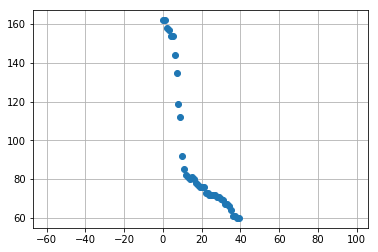

In [530]:
nn = neuralNet(4,1) 
nn.train(X_train,y_train,40)
nn.evaluate(40)